## **The AMCAT test, or the Aspiring Minds Computer Adaptive Test, is a career aptitude exam for jobseekers in India. As an adaptive test, it features a changing roster of questions that adapts to the test-taker's performance.**

## **The AMCAT is a computer adaptive test which measures job applicants on critical areas like communication skills, logical reasoning, quantitative skills and job specific domain skills thus helping recruiters identify the suitability of a candidate**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Project - 4  AMCAT Data Analysis./data.xlsx - Sheet1.csv')

In [ ]:
df.shape

(3998, 39)

In [ ]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3998.0,663794.540520,363218.245829,11244.0000,334284.250000,639600.000000,990480.000000,1.298275e+06
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00


# ***Univariate Analysis***

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
sal = df['Salary'].max()
df[df['Salary'] == sal]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
1237,48107,4000000.0,7/1/10 0:00,3/1/15 0:00,senior software engineer,New Delhi,m,9/9/87 0:00,90.83,rbse,...,-1,-1,-1,-1,-1,-0.7264,0.0328,-1.6502,-0.8778,-0.1295
2182,41147,4000000.0,1/1/10 0:00,12/1/11 0:00,automation engineer,gurgaon,m,9/13/87 0:00,53.00,up bord,...,-1,-1,-1,-1,-1,-3.3539,-0.4353,-1.0697,-0.0552,-2.6572


In [ ]:
min_sal = df['Salary'].min()
df[df['Salary'] == min_sal]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
194,211840,35000.0,1/1/12 0:00,present,systems engineer,Gurgaon,f,8/16/89 0:00,86.0,0,...,-1,-1,-1,-1,-1,-2.5811,0.0328,0.3817,0.4148,-1.0774
2627,242100,35000.0,3/1/12 0:00,present,systems engineer,Noida,m,11/24/89 0:00,88.0,icse,...,-1,-1,-1,-1,-1,0.2009,0.0328,-0.9245,0.2973,-0.1295
3473,1272092,35000.0,5/1/14 0:00,5/1/15 0:00,.net developer,hyderabad,m,1/8/93 0:00,85.3,state board,...,376,-1,-1,-1,-1,-3.7496,-5.6151,-3.8324,-0.4879,-7.3757


<Axes: xlabel='Salary', ylabel='Count'>

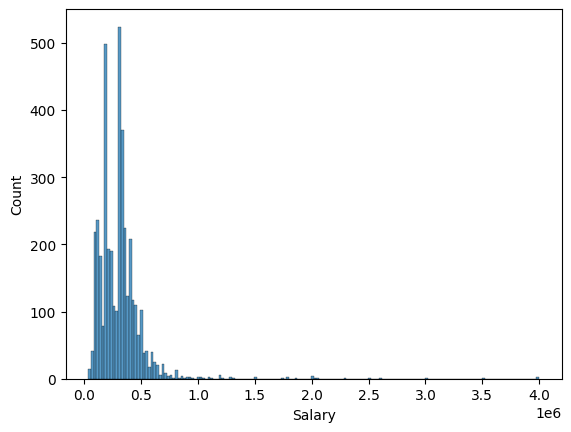

In [ ]:
sns.histplot(df['Salary'])

### The histogram shows that most salaries are concentrated between 0 and 500,000 units  with a sharp drop-off beyond that range.
###There are some higher salaries, but they are less frequent.
###The distribution is right-skewed, with a long tail extending toward higher salaries, indicating that most people earn in the lower ranges, but a few earn significantly higher amounts.

<Axes: ylabel='Salary'>

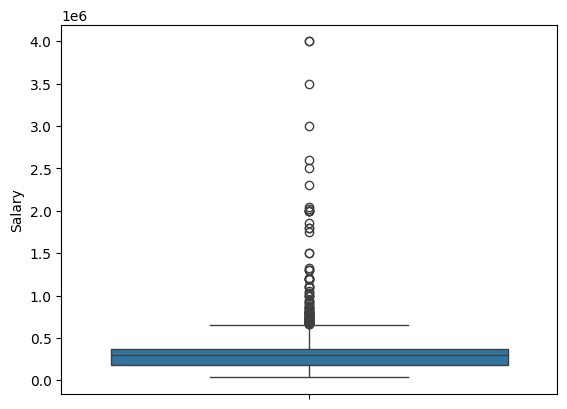

In [ ]:
sns.boxplot(df['Salary'])

### There are numerous outliers (represented as circles), indicating that some employees have significantly higher salaries than most, with salaries reaching up to 4 million.
### The whiskers show the range of typical salaries (excluding outliers), and we can see that the data has a tight salary distribution around the lower end with a few extreme values.

In [ ]:
df['Salary'].describe()

,Salary
count,3.998000e+03
mean,3.076998e+05
std,2.127375e+05
min,3.500000e+04
25%,1.800000e+05
50%,3.000000e+05
75%,3.700000e+05
max,4.000000e+06


In [ ]:
df['DOJ'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3998 entries, 0 to 3997
Series name: DOJ
Non-Null Count  Dtype 
--------------  ----- 
3998 non-null   object
dtypes: object(1)
memory usage: 31.4+ KB


In [ ]:
df['DOJ'] = pd.to_datetime(df['DOJ'])

<ipython-input-16-48f20a8330b2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOJ'] = pd.to_datetime(df['DOJ'])


In [ ]:
doj_min = df['DOJ'].min()
df[df['DOJ'] == doj_min]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
2853,611964,615000.0,1991-06-01,present,quality assurance test engineer,Noida,f,6/18/91 0:00,71.0,state board,...,-1,-1,-1,-1,-1,-1.8825,-2.7846,-0.1437,0.9066,-1.0524


In [ ]:
doj_max = df['DOJ'].max()
df[df['DOJ'] == doj_max]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
1769,1268067,325000.0,2015-12-01,present,business analyst,Bangalore,m,8/17/94 0:00,89.6,state board,...,284,-1,-1,-1,-1,-0.0154,-1.9521,-1.527,0.1459,-2.9686


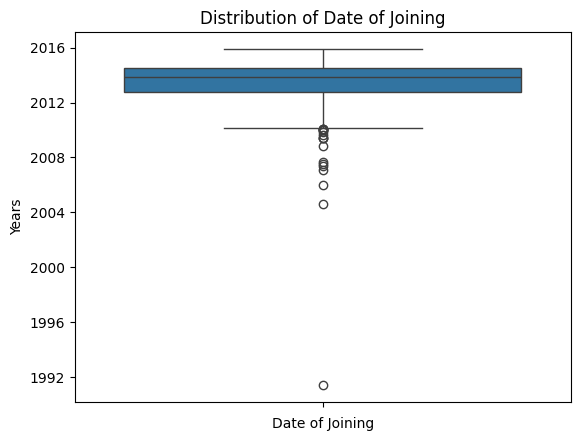

In [ ]:
sns.boxplot(df['DOJ'])
plt.title('Distribution of Date of Joining')
plt.xlabel('Date of Joining')
plt.ylabel('Years')
plt.show()

### Here, we can note that only one candidate has been employed since 1991, which suggests that this individual is an outlier.

In [ ]:
df['DOL'].value_counts()

,count
DOL,
present,1875
4/1/15 0:00,573
3/1/15 0:00,124
5/1/15 0:00,112
1/1/15 0:00,99
...,...
3/1/05 0:00,1
10/1/15 0:00,1
2/1/10 0:00,1


### Currently, 1,875 individuals are employed, while the remaining individuals are unemployed.

In [ ]:
df['Designation'].value_counts()

,count
Designation,
software engineer,539
software developer,265
system engineer,205
programmer analyst,139
systems engineer,118
...,...
cad drafter,1
noc engineer,1
human resources intern,1


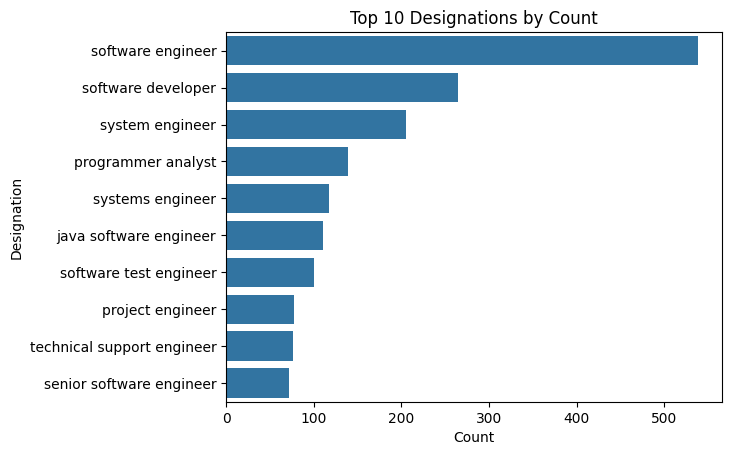

In [ ]:
top_10_designations = df['Designation'].value_counts().head(10)

sns.barplot(x=top_10_designations.values,
            y=top_10_designations.index)

plt.xlabel('Count')
plt.ylabel('Designation')
plt.title('Top 10 Designations by Count')

plt.show()

### Most of the candidates primarily come from the field of software engineering.

In [ ]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
df['JobCity'].value_counts()

,count
JobCity,
Bangalore,627
-1,461
Noida,368
Hyderabad,335
Pune,290
...,...
Tirunelvelli,1
Ernakulam,1
Nanded,1


### Most of the candidates are employed in Bangalore, Noida, Hyderabad, and Pune.

In [ ]:
df['Gender'].value_counts()

,count
Gender,
m,3041
f,957


In [ ]:
df['Gender'].value_counts(normalize = True)

,proportion
Gender,
m,0.76063
f,0.23937


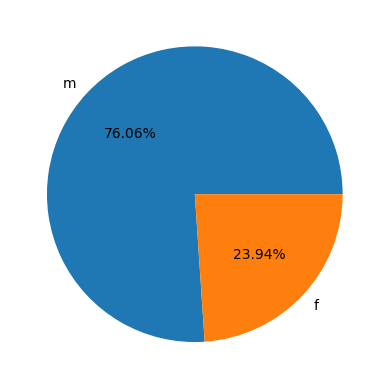

In [ ]:
plt.pie(df['Gender'].value_counts(normalize = True), labels = df['Gender'].value_counts().index, autopct = '%.2f%%')
plt.show()

### Here, we can observe that the majority of the AMCAT candidates are male with  76.06%

In [ ]:
df['DOB'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3998 entries, 0 to 3997
Series name: DOB
Non-Null Count  Dtype 
--------------  ----- 
3998 non-null   object
dtypes: object(1)
memory usage: 31.4+ KB


In [ ]:
df['DOB'] = pd.to_datetime(df['DOB'])

<ipython-input-29-d63d72ceeb51>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB'] = pd.to_datetime(df['DOB'])


In [ ]:
df['age'] = (pd.Timestamp.today().year - df['DOB'].dt.year)

In [ ]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
0,203097,420000.0,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,34
1,579905,500000.0,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,35
2,810601,325000.0,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,32
3,267447,1100000.0,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,35
4,343523,200000.0,2014-03-01,3/1/15 0:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,33


In [ ]:
df['age'].describe()

,age
count,3998.000000
mean,33.572536
std,1.767473
min,27.000000
25%,32.000000
50%,33.000000
75%,35.000000
max,47.000000


In [ ]:
df['age'].value_counts()

,count
age,
33,979
32,855
34,774
35,522
36,308
31,299
37,116
38,62
30,31


### Here, we can conclude that most of the candidates are in their 30s, with a minimum age of 27 and a maximum age of 47.

In [ ]:
df['10board'].value_counts()

,count
10board,
cbse,1395
state board,1164
0,350
icse,281
ssc,122
...,...
"hse,orissa",1
national public school,1
nagpur board,1


In [ ]:
df['10board'].value_counts(normalize=True)

,proportion
10board,
cbse,0.348924
state board,0.291146
0,0.087544
icse,0.070285
ssc,0.030515
...,...
"hse,orissa",0.000250
national public school,0.000250
nagpur board,0.000250


###  Here, we can see that 60% of the candidates are from the CBSE board and State Board, while the remaining 40% come from other boards.


In [ ]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'age'],
      dtype='object')

In [ ]:
df['GraduationYear'].value_counts()

,count
GraduationYear,
2013,1181
2014,1036
2012,847
2011,507
2010,292
2015,94
2009,24
2017,8
2016,7


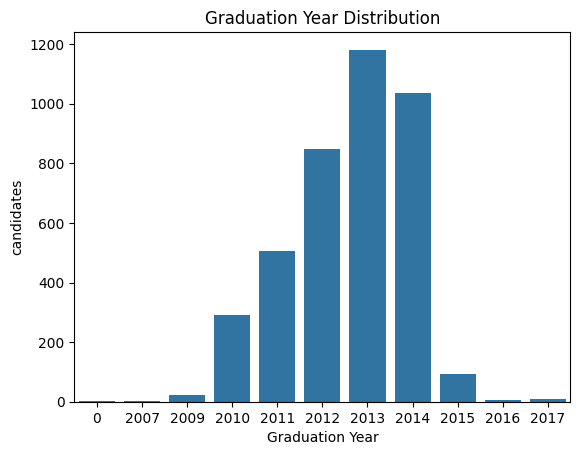

In [ ]:
sns.barplot(x = df['GraduationYear'].value_counts().index, y = df['GraduationYear'].value_counts())
plt.xlabel('Graduation Year')
plt.ylabel('candidates')
plt.title('Graduation Year Distribution')
plt.show()

In [ ]:
df['12graduation'].value_counts()

,count
12graduation,
2009,1052
2008,935
2010,742
2007,528
2006,407
2005,160
2004,73
2011,46
2003,25


In [ ]:
df['Degree'].value_counts(normalize = True)

,proportion
Degree,
B.Tech/B.E.,0.925463
MCA,0.060780
M.Tech./M.E.,0.013257
M.Sc. (Tech.),0.000500


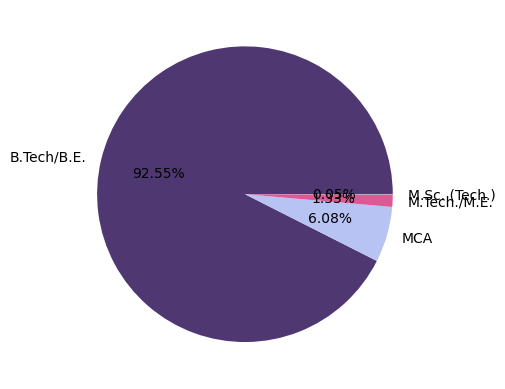

In [ ]:
colors = ['#4F3872', '#B7C3F3', '#DD5996', '#8EB897']
plt.pie(df['Degree'].value_counts(normalize = True), labels = df['Degree'].value_counts().index, autopct = '%.2f%%',colors = colors)
plt.show()

### The data indicates that approximately 92.55% of candidates hold B.Tech/B.E. degrees, with only 6.08% having an MCA and smaller proportions of 1.33% for M.Tech./M.E. and 0.05% for M.Sc. (Tech.). This highlights a strong prevalence of undergraduate engineering qualifications among the candidates.

In [ ]:
df['CollegeState'].value_counts()

,count
CollegeState,
Uttar Pradesh,915
Karnataka,370
Tamil Nadu,367
Telangana,319
Maharashtra,262
Andhra Pradesh,225
West Bengal,196
Punjab,193
Madhya Pradesh,189


### The majority of candidates are coming from the following states: Uttar Pradesh, Karnataka, Tamil Nadu, and Telangana

In [ ]:
df['CollegeTier'].value_counts(normalize = True)

,proportion
CollegeTier,
2,0.925713
1,0.074287


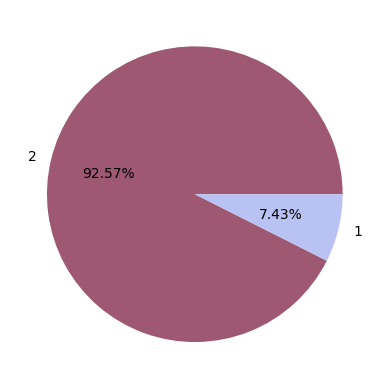

In [ ]:
colors = ['#9F5872', '#B9C3F3', '#DD3896', '#8EB897']
plt.pie(df['CollegeTier'].value_counts(normalize = True), labels = df['CollegeTier'].value_counts().index, autopct = '%.2f%%', colors = colors)
plt.show()

In [ ]:
df['Specialization'].value_counts()

,count
Specialization,
electronics and communication engineering,880
computer science & engineering,744
information technology,660
computer engineering,600
computer application,244
mechanical engineering,201
electronics and electrical engineering,196
electronics & telecommunications,121
electrical engineering,82


### Here, we can observe that the majority of candidates have specializations in Electronic Engineering and Computer Science.

# ***Bivariate Analysis***


In [ ]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'age'],
      dtype='object')

In [ ]:
df['Salary'].describe()

,Salary
count,3.998000e+03
mean,3.076998e+05
std,2.127375e+05
min,3.500000e+04
25%,1.800000e+05
50%,3.000000e+05
75%,3.700000e+05
max,4.000000e+06


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

df.describe()

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
count,3998.00,3998.00,3998,3998,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,...,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00
mean,663794.54,307699.85,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.93,2008.09,74.47,5156.85,1.93,71.49,...,22.97,16.48,31.85,2.68,-0.04,0.15,0.00,-0.17,-0.14,33.57
min,11244.00,35000.00,1991-06-01 00:00:00,1977-10-30 00:00:00,43.00,1995.00,40.00,2.00,1.00,6.45,...,-1.00,-1.00,-1.00,-1.00,-4.13,-5.78,-4.60,-2.64,-7.38,27.00
25%,334284.25,180000.00,2012-10-01 00:00:00,1989-11-16 06:00:00,71.68,2007.00,66.00,494.00,2.00,66.41,...,-1.00,-1.00,-1.00,-1.00,-0.71,-0.29,-0.60,-0.87,-0.67,32.00
50%,639600.00,300000.00,2013-11-01 00:00:00,1991-03-07 12:00:00,79.15,2008.00,74.40,3879.00,2.00,71.72,...,-1.00,-1.00,-1.00,-1.00,0.05,0.21,0.09,-0.23,-0.09,33.00
75%,990480.00,370000.00,2014-07-01 00:00:00,1992-03-13 18:00:00,85.67,2009.00,82.60,8818.00,2.00,76.33,...,-1.00,-1.00,-1.00,-1.00,0.70,0.81,0.67,0.53,0.50,35.00
max,1298275.00,4000000.00,2015-12-01 00:00:00,1997-05-27 00:00:00,97.76,2013.00,98.70,18409.00,2.00,99.93,...,623.00,676.00,548.00,516.00,2.00,1.90,2.54,3.35,1.82,47.00
std,363218.25,212737.50,NaN,NaN,9.85,1.65,11.00,4802.26,0.26,8.17,...,98.12,87.59,104.85,36.66,1.03,0.94,0.95,1.01,1.01,1.77


### Removing outliers from salary

In [ ]:
q1 = df['Salary'].quantile(0.25)
q3 = df['Salary'].quantile(0.75)
iqr = q3 - q1

In [ ]:
iqr

190000.0

In [ ]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [ ]:
df_filterd = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]
df_filterd

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
0,203097,420000.00,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,0.97,0.81,0.53,1.35,-0.45,34
1,579905,500000.00,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-0.73,0.38,1.24,-0.11,0.86,35
2,810601,325000.00,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,0.27,1.71,0.16,-0.87,0.67,32
4,343523,200000.00,2014-03-01,3/1/15 0:00,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-0.88,-0.28,-1.07,0.09,-0.13,33
5,1027655,300000.00,2014-06-01,present,system engineer,Hyderabad,m,1992-07-02,89.92,state board,...,-1,-1,-1,-1,-0.30,-0.62,-2.30,-0.74,-0.86,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.00,2011-10-01,10/1/12 0:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-0.11,0.34,0.24,0.65,-0.92,37
3994,752781,100000.00,2013-07-01,7/1/13 0:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-0.30,0.88,0.93,0.78,-0.09,32
3995,355888,320000.00,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1.58,-1.53,-1.51,-1.32,-0.76,33
3996,947111,200000.00,2014-07-01,1/1/15 0:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,-1,-1,-1,-1,-0.16,0.05,-0.45,-0.36,-0.09,32


In [ ]:
df_filterd['Salary'].describe()

,Salary
count,3889.00
mean,285447.16
std,126514.54
min,35000.00
25%,180000.00
50%,300000.00
75%,360000.00
max,655000.00


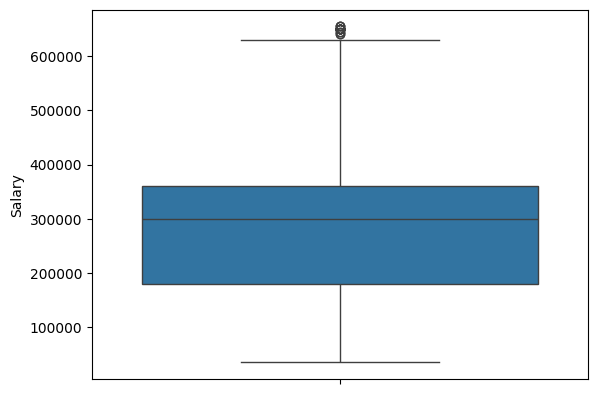

In [ ]:
sns.boxplot(df_filterd['Salary'])
plt.show()

In [ ]:
df_filterd.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'age'],
      dtype='object')

In [ ]:
df_filterd.groupby('collegeGPA')['Salary'].max().sort_values(ascending = False)

,Salary
collegeGPA,
83.00,655000.00
93.60,655000.00
66.00,655000.00
66.74,650000.00
88.60,650000.00
...,...
68.41,55000.00
74.95,50000.00
67.96,45000.00


### GPA does not have a significant impact on salary.


### The salary data indicates that candidates in cities like Mumbai, Gurgaon, and Bangalore have an highest salary of 655,000, while those in cities like Bhubaneswar, Ahmedabad, and Trichur have significantly lower  salaries, starting at 80,000.

In [ ]:
clg_tie_avg = df_filterd.groupby('CollegeTier')['Salary'].mean().sort_values(ascending = False)
clg_tie_avg

,Salary
CollegeTier,
1,368288.97
2,279438.50


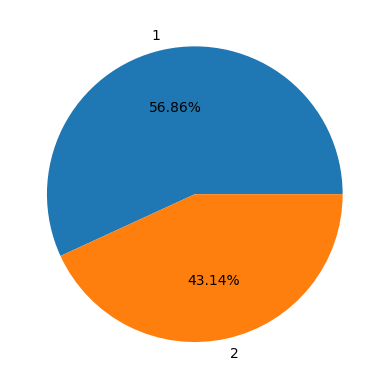

In [ ]:
plt.pie(clg_tie_avg, labels = clg_tie_avg.index, autopct = '%.2f%%')
plt.show()

### This pie chart indicates that candidates from College Tier 1 have the highest average salary.


In [ ]:
deg_sal = df_filterd.groupby('Degree')['Salary'].mean().sort_values(ascending = False)
deg_sal

,Salary
Degree,
M.Sc. (Tech.),320000.00
M.Tech./M.E.,294270.83
B.Tech/B.E.,287995.01
MCA,244276.60


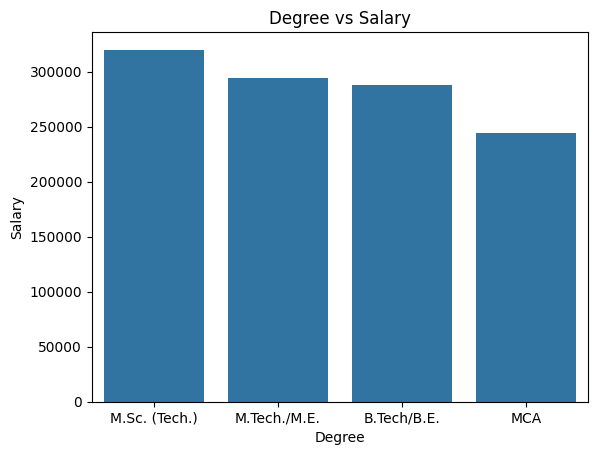

In [ ]:
sns.barplot(x = deg_sal.index, y = deg_sal.values)
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.title('Degree vs Salary')
plt.show()

### Here, we can observe that M.Sc. (Tech.) candidates have the highest average salary, while MCA candidates receive the lowest average salary.

In [ ]:
spe_avg = df_filterd.groupby('Specialization')['Salary'].mean().sort_values(ascending = False).head(10)
spe_avg

,Salary
Specialization,
computer networking,565000.00
information science,460000.00
information & communication technology,387500.00
industrial engineering,370000.00
internal combustion engine,360000.00
industrial & production engineering,353888.89
telecommunication engineering,342500.00
metallurgical engineering,337500.00
computer engineering,335245.18


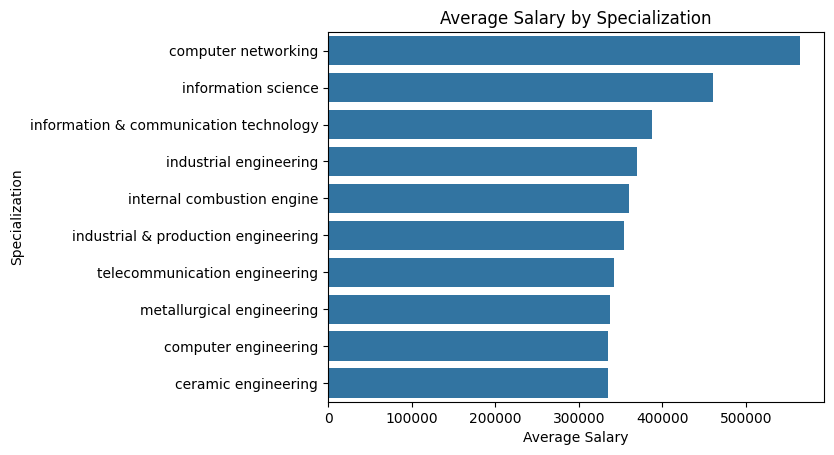

In [ ]:
sns.barplot(x = spe_avg.values, y = spe_avg.index)
plt.xlabel('Average Salary')
plt.ylabel('Specialization')
plt.title('Average Salary by Specialization')
plt.show()

### The highest average salary of 500,000 is reported for candidates specializing in the Computer Science field

In [ ]:
df_filterd.groupby('Designation')['Salary'].mean().sort_values(ascending = False).head(10)

,Salary
Designation,
technology lead,645000.00
technical analyst,600000.00
asst. manager,600000.00
sr. database engineer,600000.00
technology analyst,569166.67
senior quality assurance engineer,550000.00
business consultant,550000.00
senior .net developer,516250.00
operations,505000.00


### we can observe that Technology Lead positions have the highest average salary.

In [ ]:
sal_gen = df_filterd.groupby('Gender')['Salary'].mean()
sal_gen

,Salary
Gender,
f,278347.55
m,287703.83


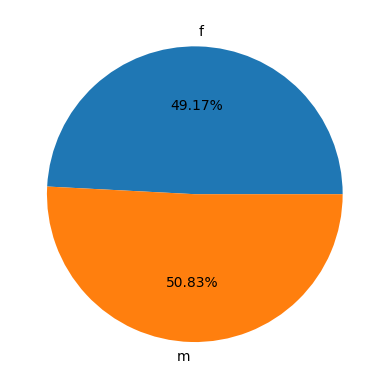

In [ ]:
plt.pie(sal_gen, labels = sal_gen.index, autopct = '%.2f%%')
plt.show()

### The average salaries for male and female candidates are almost same.

In [ ]:
pd.crosstab(df_filterd['Degree'], df_filterd['CollegeTier'], margins=True)

CollegeTier,1,2,All
Degree,,,
B.Tech/B.E.,242,3362,3604
M.Sc. (Tech.),1,1,2
M.Tech./M.E.,10,38,48
MCA,10,225,235
All,263,3626,3889


### Here, we can conclude that the majority of candidates are graduating from Tier 2 colleges, while the number of graduates from Tier 1 colleges is significantly lower.

In [ ]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'age'],
      dtype='object')

In [ ]:
df['collegeGPA'].describe()

,collegeGPA
count,3998.00
mean,71.49
std,8.17
min,6.45
25%,66.41
50%,71.72
75%,76.33
max,99.93


In [71]:
pd.crosstab(df_filterd['Degree'], df_filterd['Gender'], margins=True)

Gender,f,m,All
Degree,,,
B.Tech/B.E.,872,2732,3604
M.Sc. (Tech.),1,1,2
M.Tech./M.E.,8,40,48
MCA,57,178,235
All,938,2951,3889


### The table above illustrates the distribution of candidates by degree, categorized according to gender.

In [88]:
pd.crosstab(df_filterd['Gender'], df_filterd['Specialization'], margins=True).T

Gender,f,m,All
Specialization,,,
aeronautical engineering,1,2,3
applied electronics and instrumentation,2,6,8
automobile/automotive engineering,0,5,5
biomedical engineering,2,0,2
biotechnology,9,6,15
ceramic engineering,0,1,1
chemical engineering,1,6,7
civil engineering,5,19,24
computer and communication engineering,0,1,1


In [89]:
from scipy.stats import chi2_contingency

In [ ]:
contingency_table = pd.crosstab(df_filterd['Specialization'], df_filterd['Gender'])

In [92]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

if p < 0.05:
    print("There is a significant relationship between gender and specialization.")
else:
    print("There is no significant relationship between gender and specialization.")

Chi-Square statistic: 99.5948367583891
P-value: 3.4222469473345494e-06
Degrees of Freedom: 44
There is a significant relationship between gender and specialization.


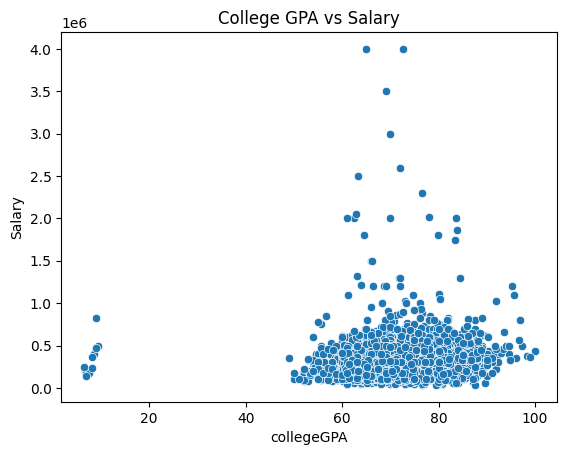

In [72]:
sns.scatterplot(x='collegeGPA', y='Salary', data=df)
plt.title('College GPA vs Salary')
plt.show()


In [73]:
# Removing outliers from collegeGPA column

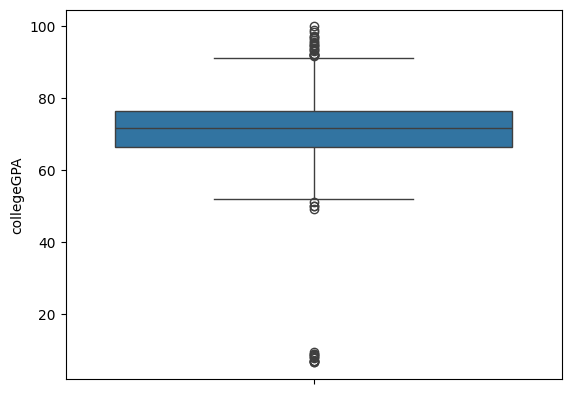

In [74]:
sns.boxplot(df['collegeGPA'])
plt.show()

In [75]:
df_filterd.shape

(3889, 39)

In [76]:
dm  = df_filterd[df_filterd['collegeGPA'] >= 35.0 ]
dm

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
0,203097,420000.00,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,0.97,0.81,0.53,1.35,-0.45,34
1,579905,500000.00,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-0.73,0.38,1.24,-0.11,0.86,35
2,810601,325000.00,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,0.27,1.71,0.16,-0.87,0.67,32
4,343523,200000.00,2014-03-01,3/1/15 0:00,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-0.88,-0.28,-1.07,0.09,-0.13,33
5,1027655,300000.00,2014-06-01,present,system engineer,Hyderabad,m,1992-07-02,89.92,state board,...,-1,-1,-1,-1,-0.30,-0.62,-2.30,-0.74,-0.86,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.00,2011-10-01,10/1/12 0:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-0.11,0.34,0.24,0.65,-0.92,37
3994,752781,100000.00,2013-07-01,7/1/13 0:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-0.30,0.88,0.93,0.78,-0.09,32
3995,355888,320000.00,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1.58,-1.53,-1.51,-1.32,-0.76,33
3996,947111,200000.00,2014-07-01,1/1/15 0:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,-1,-1,-1,-1,-0.16,0.05,-0.45,-0.36,-0.09,32


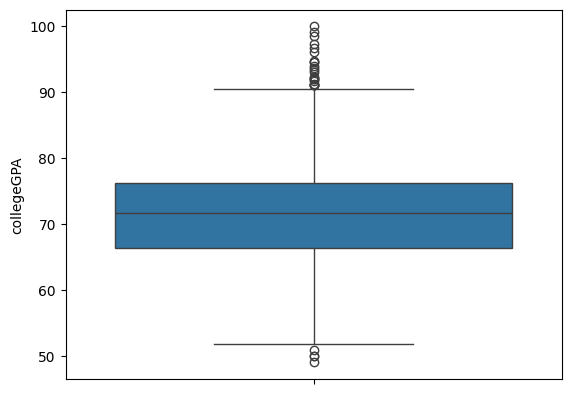

In [77]:
sns.boxplot(dm['collegeGPA'])
plt.show()

In [78]:
dm.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
0,203097,420000.00,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,0.97,0.81,0.53,1.35,-0.45,34
1,579905,500000.00,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-0.73,0.38,1.24,-0.11,0.86,35
2,810601,325000.00,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,0.27,1.71,0.16,-0.87,0.67,32
4,343523,200000.00,2014-03-01,3/1/15 0:00,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-0.88,-0.28,-1.07,0.09,-0.13,33
5,1027655,300000.00,2014-06-01,present,system engineer,Hyderabad,m,1992-07-02,89.92,state board,...,-1,-1,-1,-1,-0.30,-0.62,-2.30,-0.74,-0.86,32


In [104]:
hw_e = df[df['Designation'] == 'hardware engineer' ]
hw_e

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
197,1001099,240000.00,2014-09-01,present,hardware engineer,chennai,m,1993-06-06,81.00,state board,...,-1,580,-1,-1,0.13,-0.62,0.01,0.78,-0.86,31
802,1077576,450000.00,2014-02-01,present,hardware engineer,Bangalore,m,1991-07-26,83.30,state board,...,-1,-1,-1,-1,-0.02,-0.62,0.32,-1.50,-1.82,33
839,693533,315000.00,2013-08-01,2/1/15 0:00,hardware engineer,Mumbai,m,1989-10-02,78.80,cbse,...,-1,-1,366,-1,0.27,1.21,0.16,-0.99,0.48,35
1886,354739,105000.00,2014-03-01,4/1/15 0:00,hardware engineer,Bangalore,m,1988-08-12,56.00,state,...,-1,-1,-1,-1,-1.81,0.38,0.27,0.18,-0.13,36
2070,555964,180000.00,2014-05-01,present,hardware engineer,Bangalore,f,1991-10-18,86.40,0,...,-1,-1,-1,-1,0.42,0.55,-1.07,0.27,1.06,33
2533,909998,400000.00,2014-07-01,5/1/15 0:00,hardware engineer,Coimbatore,f,1993-02-11,88.00,state board,...,-1,-1,-1,-1,0.13,0.88,0.47,-1.50,-0.09,31
3438,341274,400000.00,2013-10-01,present,hardware engineer,-1,m,1990-12-08,90.58,maharashtra state board of secondary and highe...,...,-1,-1,-1,-1,0.16,0.66,-0.49,-1.14,-0.45,34
3547,212076,160000.00,2014-01-01,present,hardware engineer,Mumbai,m,1989-02-25,55.33,0,...,-1,-1,-1,-1,-0.26,0.03,0.82,0.53,-0.29,35


In [105]:
hw_e['Salary'].mean()

281250.0

Hardware Engineer salary is 2.8 lakh

In [96]:
cse =  dm[dm['Specialization'] == 'computer science & engineering']
cse.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
6,947847,300000.00,2014-08-01,5/1/15 0:00,java software engineer,Banglore,m,1993-02-01,86.08,state board,...,-1,-1,-1,-1,1.71,-0.11,-1.04,-2.01,-1.09,31
18,711342,120000.00,2014-01-01,6/1/14 0:00,data entry operator,Gurgaon,m,1992-12-07,65.00,state board,...,-1,-1,-1,-1,-0.16,0.38,1.39,-0.23,1.44,32
24,963123,335000.00,2014-06-01,6/1/15 0:00,programmer analyst,Hyderabad,m,1993-06-28,88.00,state board,...,-1,-1,-1,-1,0.42,0.80,0.14,-0.99,-0.67,31
25,350211,435000.00,2012-09-01,present,systems analyst,Gurgaon,f,1991-03-02,86.80,cbse,...,-1,-1,-1,-1,0.05,1.20,-0.92,0.53,-0.29,33
31,1094324,340000.00,2014-08-01,4/1/15 0:00,software engineer,Bangalore,m,1992-10-23,77.20,state board,...,-1,-1,-1,-1,-0.02,1.21,1.09,-1.50,0.29,32


In [109]:
cse_jobs = cse[cse['Designation'].isin(['programmer analyst','software engineer','associate engineer'])]
cse_jobs

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
24,963123,335000.00,2014-06-01,6/1/15 0:00,programmer analyst,Hyderabad,m,1993-06-28,88.00,state board,...,-1,-1,-1,-1,0.42,0.80,0.14,-0.99,-0.67,31
31,1094324,340000.00,2014-08-01,4/1/15 0:00,software engineer,Bangalore,m,1992-10-23,77.20,state board,...,-1,-1,-1,-1,-0.02,1.21,1.09,-1.50,0.29,32
48,338428,390000.00,2013-09-01,present,software engineer,Bangalore,m,1991-02-28,86.60,cbse,...,-1,-1,-1,-1,-2.50,0.03,0.38,0.27,0.50,33
52,794209,400000.00,2015-04-01,present,software engineer,Navi Mumbai,m,1992-03-09,85.20,icse,...,-1,-1,-1,-1,1.13,0.38,1.09,0.65,0.29,32
55,989860,250000.00,2014-08-01,present,software engineer,Mangalore,m,1992-02-13,90.80,state board,...,-1,-1,-1,-1,-0.30,0.71,-0.30,1.16,-0.48,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,638674,105000.00,2014-10-01,4/1/15 0:00,software engineer,Kochi/Cochin,f,1991-12-14,93.00,state board,...,-1,-1,-1,-1,-0.30,0.55,-0.60,-1.63,0.29,33
3939,716325,100000.00,2013-07-01,12/1/14 0:00,software engineer,Hyderabad,m,1992-07-05,65.00,state board,...,-1,-1,-1,-1,-0.30,-1.95,-0.60,1.16,-1.82,32
3959,775902,390000.00,2014-01-01,4/1/15 0:00,software engineer,Gurgaon,m,1991-09-30,89.60,cbse,...,-1,-1,-1,-1,-0.16,0.71,0.93,-0.74,0.29,33
3981,1077872,220000.00,2014-09-01,present,software engineer,Gurgaon,m,1991-12-17,53.40,cbse,...,-1,-1,-1,-1,0.13,-0.29,-0.14,-1.12,1.44,33


In [110]:
cse_jobs.groupby('Designation')['Salary'].mean()

,Salary
Designation,
associate engineer,332500.00
programmer analyst,323846.15
software engineer,320367.65


### The data shows that fresh graduates in roles such as Associate Engineer, Programmer Analyst, Software Engineer, and Hardware Engineer earn salaries ranging from ₹2.8 to ₹3.3 lakhs. This supports the Times of India's claim that fresh graduates can earn between ₹2.5-3 lakhs, with some earning slightly above the range.

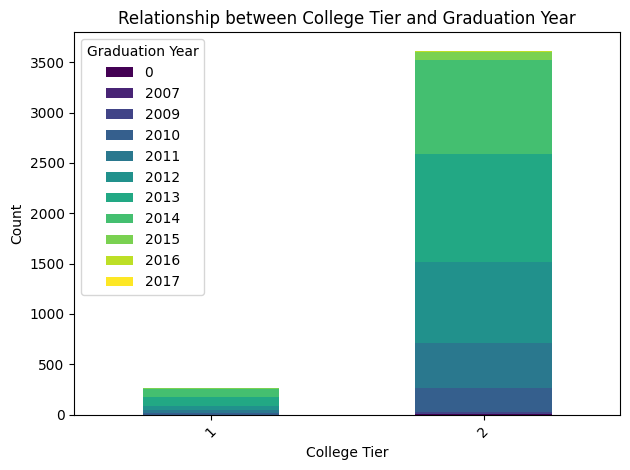

In [79]:
cross_tab = pd.crosstab(dm['CollegeTier'], dm['GraduationYear'])

cross_tab.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Relationship between College Tier and Graduation Year')
plt.ylabel('Count')
plt.xlabel('College Tier')
plt.legend(title='Graduation Year')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### The data suggests that *Tier 2 colleges* have been producing more graduates compared to Tier 1 colleges, particularly in recent years.
### The stacked bar chart gives a clear visual representation of how the *number of graduates per year varies between college tiers* over time.

In [84]:
dm.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age
0,203097,420000.00,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,0.97,0.81,0.53,1.35,-0.45,34
1,579905,500000.00,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-0.73,0.38,1.24,-0.11,0.86,35
2,810601,325000.00,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,0.27,1.71,0.16,-0.87,0.67,32
4,343523,200000.00,2014-03-01,3/1/15 0:00,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-0.88,-0.28,-1.07,0.09,-0.13,33
5,1027655,300000.00,2014-06-01,present,system engineer,Hyderabad,m,1992-07-02,89.92,state board,...,-1,-1,-1,-1,-0.30,-0.62,-2.30,-0.74,-0.86,32


In [85]:
mum_df = dm.select_dtypes(include=['int64', 'float64'])
mum_df.head()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.00,84.30,2007,95.80,1141,2,78.00,1141,0,...,-1,-1,-1,-1,-1,0.97,0.81,0.53,1.35,-0.45
1,579905,500000.00,85.40,2007,85.00,5807,2,70.06,5807,0,...,-1,-1,-1,-1,-1,-0.73,0.38,1.24,-0.11,0.86
2,810601,325000.00,85.00,2010,68.20,64,2,70.00,64,0,...,-1,-1,-1,-1,-1,0.27,1.71,0.16,-0.87,0.67
4,343523,200000.00,78.00,2008,76.80,11368,2,73.90,11368,0,...,-1,-1,-1,-1,-1,-0.88,-0.28,-1.07,0.09,-0.13
5,1027655,300000.00,89.92,2010,87.00,5086,2,76.32,5086,0,...,407,-1,-1,-1,-1,-0.30,-0.62,-2.30,-0.74,-0.86


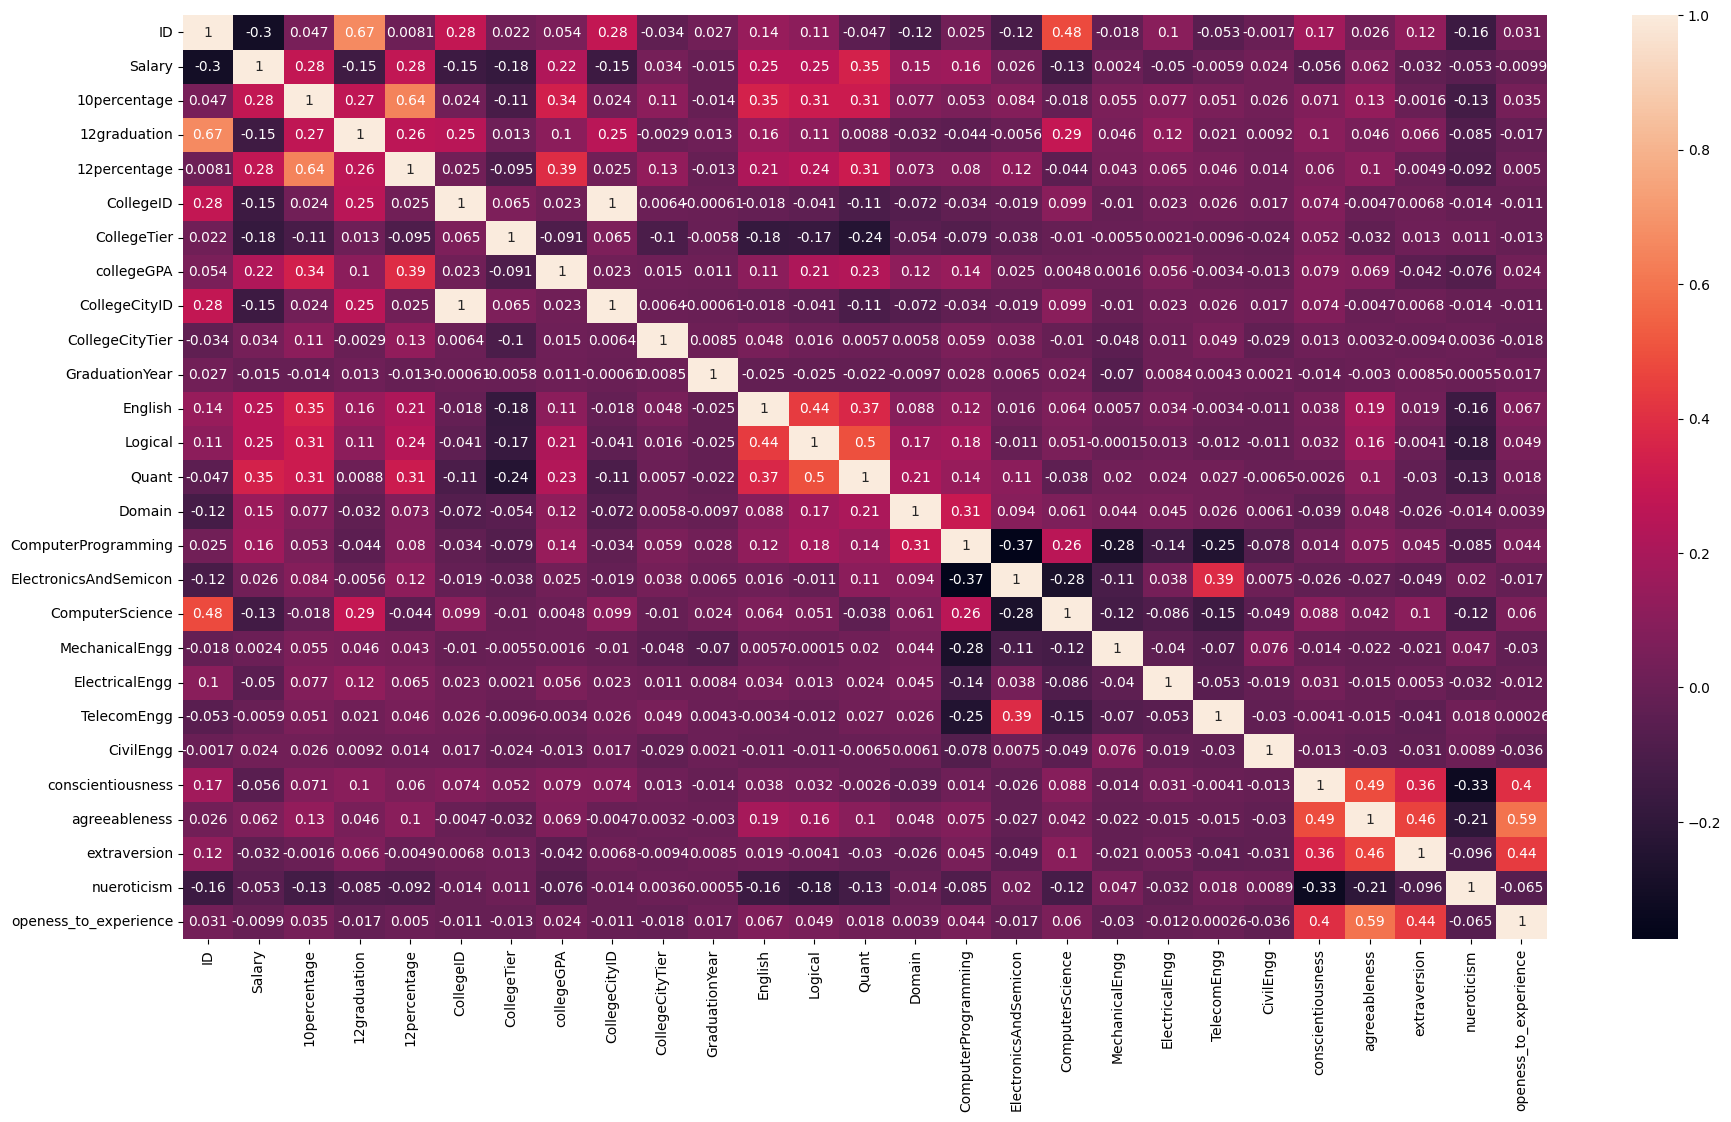

In [86]:
plt.figure(figsize=(22,12))
sns.heatmap(mum_df.corr(), annot=True)
plt.show()

### The heatmap reveals a negative correlation between Salary and Computer Science (-0.48) and 12percentage (-0.28). Positive correlations exist between 10percentage and 12percentage (0.64) and among personality traits like conscientiousness and openness_to_experience (0.59). Strong links are observed between MechanicalEngg and ElectricalEngg (0.43), and ElectronicsAndSemicon with TelecomEngg (0.39). Additionally, traits like extraversion and openness_to_experience (0.61) show a positive relationship.*

# ***AMCAT EDA Analysis Conclusion:***

1. Field of Specialization: Most of the candidates primarily come from the field
of Software Engineering, followed by other technical specializations like Electronics Engineering and Computer Science, reflecting a strong preference for technical fields.

2. Gender Distribution: A significant majority of the AMCAT candidates are male (76.06%), indicating a notable gender disparity, although the overall distribution shows increasing female participation as well.

3. Educational Background: Approximately 60% of the candidates come from CBSE and State Boards, with the remaining 40% from other educational boards, highlighting a balanced diversity in school backgrounds.

4. Degree Qualification: The data indicates that 92.55% of the candidates hold B.Tech/B.E. degrees, with smaller proportions holding MCA (6.08%), M.Tech./M.E. (1.33%), and M.Sc. (Tech.) (0.05%) degrees. This demonstrates a strong prevalence of undergraduate engineering qualifications.

5. Regional Distribution: The majority of candidates come from key states such as Uttar Pradesh, Karnataka, Tamil Nadu, and Telangana, suggesting these regions are significant talent pools for engineering graduates.

6. Salary Trends: The highest average salary of 500,000 is observed for candidates specializing in Computer Science, reflecting the high demand and earning potential in this field. Overall, Computer Science and Software Engineering remain lucrative fields.

7. College Tier: The majority of candidates are graduating from Tier 2 colleges, with significantly fewer graduates from Tier 1 institutions, indicating that Tier 2 colleges are a major source of talent for the job market.

**Overall, the EDA reveals a predominantly male, B.Tech/B.E.-qualified candidate pool, mostly from Tier 2 colleges and specializing in technical fields like Computer Science and Electronics, with Uttar Pradesh and Karnataka leading in candidate numbers. The Computer Science specialization stands out for offering the highest salaries among the candidates.**










